<h1 style="text-align: center;">1 Setup</h1>


This file is opened via Jupyter-notebook. To Install it, please check details in: https://jupyter.org/install

```shell
conda install -c conda-forge jupyterlab
```
Python for beginner (Python & Pycharm). If you have zero knowledge about Python, no worry. Here is an one hour course: [Link](https://www.youtube.com/watch?v=kqtD5dpn9C8). You can continue to learn the rest after watching this short-course.

In [ ]:
!conda install anaconda::nltk --yes

In [ ]:
!conda install conda-forge::matplotlib --yes

In [ ]:
!conda install conda-forge::wordcloud --yes

In [ ]:
!conda install anaconda::seaborn --yes

<h1 style="text-align: center;" id="part-1">2 Install NLTK and spaCy</h1>

## NLTK

In [149]:
# before import you should install nltk
import sys
import nltk
# download all datasets in nltk
# nltk.data.path.append('/Users/baojianzhou/nltk_data')
nltk.download()
# from NLTK's book module, load all items.
from nltk.book import *

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [150]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [151]:
# enter their names at the Python prompt
print(text1) # The text of Moby-Dick

<Text: Moby Dick by Herman Melville 1851>


In [152]:
print(text2)

<Text: Sense and Sensibility by Jane Austen 1811>


In [153]:
print(sent1)
print(sent2)

['Call', 'me', 'Ishmael', '.']
['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']


## spaCy

In [ ]:
!conda install conda-forge::spacy --yes

In [ ]:
!python -m spacy download en_core_web_sm

In [154]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Text: The original word text.
# Lemma: The base form of the word.
# POS: The simple UPOS part-of-speech tag.
# Tag: The detailed part-of-speech tag.
# Dep: Syntactic dependency, i.e. the relation between tokens.
# Shape: The word shape – capitalization, punctuation, digits.
# is alpha: Is the token an alpha character? (whether it consists only of letters from the alphabet (A-Z or a-z))
# is stop: Is the token part of a stop list, i.e. the most common words of the language? 
#         (A stop list (or stopwords list) is a list of commonly used words in a language that 
#         are usually ignored during natural language processing (NLP) tasks, such as text analysis or machine learning.)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP nsubj X.X. False False
startup startup VERB VBD ccomp xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


<h1 style="text-align: center;" id="part-2">3 Text Searching and RE </h1>

## Text Searching

In [155]:
# Task: plot Cumulative Frequency Plot for 50 Most Frequently Words in Moby Dick
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
font = {'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font',  **font)
plt.rcParams["figure.figsize"] = (15, 8)

In [156]:
# Task: look up the context of word "monstrous" in Moby Dick (text1) 
print('-'*17)
text1.concordance("monstrous")
print('-'*17)
text1.concordance("fudan")

-----------------
Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u
-----------------
no matches


In [157]:
# Task: find similar context,
# we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size. 
# What other words appear in a similar range of contexts?
text1.similar("monstrous")
print('-'*17)
text1.similar("good")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless
-----------------
great much large small the in it that long white common old with whale
well certain close such important considerable


In [159]:
# Task: find common context of two words
# The term "common_contexts" allows us to examine 
# just the contexts that are shared by two or more words
text1.common_contexts(["good", "great"])
text1.common_contexts(["monstrous", "very"])

a_deal as_a a_long a_christian a_man a_whale so_a the_god too_a
No common contexts were found


In [160]:
def dispersion_plot(text, words, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or iter(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    :return: a matplotlib Axes object that may still be modified before plotting
    :rtype: Axes
    """

    try:
        import matplotlib.pyplot as plt
    except ImportError as e:
        raise ImportError(
            "The plot function requires matplotlib to be installed. "
            "See https://matplotlib.org/"
        ) from e

    word2y = {
        word.casefold() if ignore_case else word: y
        for y, word in enumerate(reversed(words)) # should not be reversed(words)
    }
    xs, ys = [], []
    for x, token in enumerate(text):
        token = token.casefold() if ignore_case else token
        y = word2y.get(token)
        if y is not None:
            xs.append(x)
            ys.append(y)

    _, ax = plt.subplots()
    ax.plot(xs, ys, "|")
    ax.set_yticks(list(range(len(words))), reversed(words), color="C0") # or put revered here.
    ax.set_ylim(-1, len(words))
    ax.set_title(title)
    ax.set_xlabel("Word Offset")
    return ax

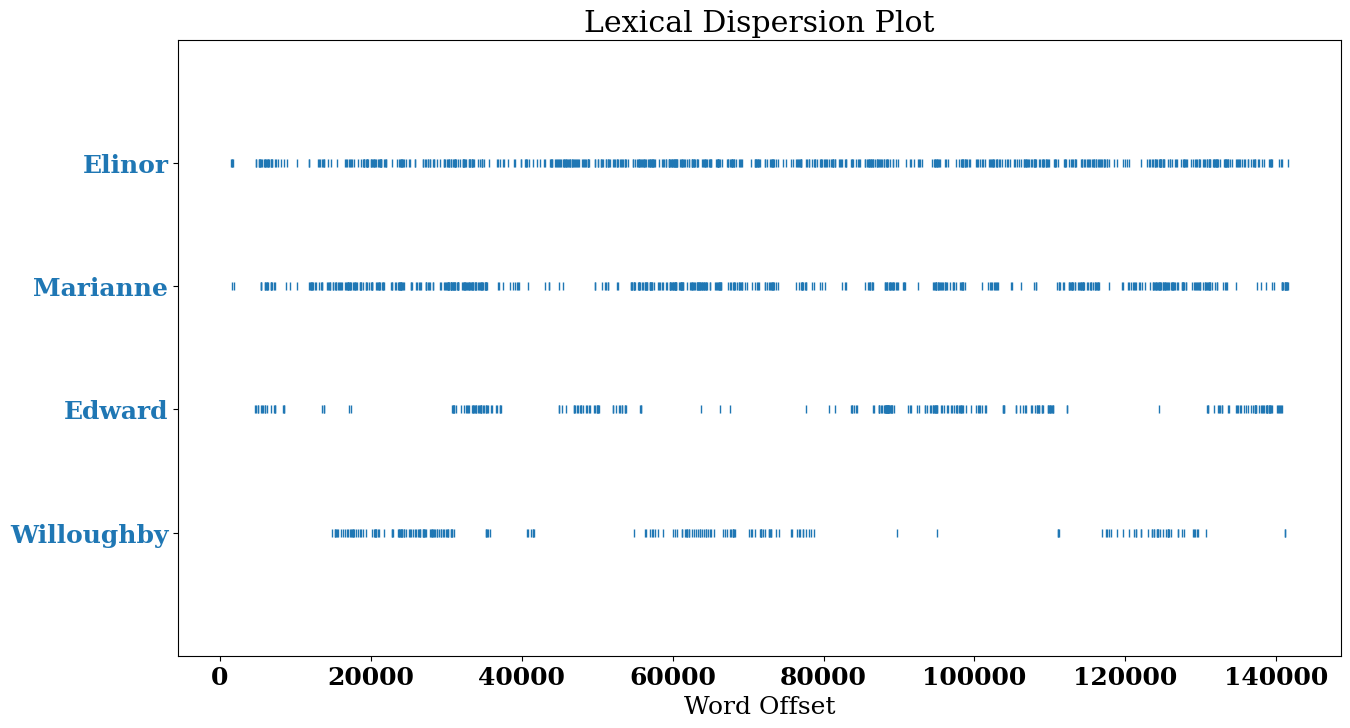

In [163]:
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

words = ["Elinor", "Marianne", "Edward", "Willoughby"]
dispersion_plot(gutenberg.words("austen-sense.txt"), words)
plt.show()
plt.close()

In [ ]:
# Task: generate some random text in the various styles we have just seen.
text1.generate()

In [ ]:
# Task: generate word cloud you may need to install wordcloud first
words = [w for w in text2]
wc = WordCloud(background_color='white', max_words=2000, stopwords=STOPWORDS, max_font_size=50, random_state=17)
wc.generate(' '.join(words))
plt.rcParams["figure.figsize"] = (6, 4)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
# Task: count how many words (including punctuation symbols) in the book of Genesis
len(text3)
# So Genesis has 44,764 words and punctuation symbols, or "tokens." 
# A token is the technical name for a sequence of characters — 
# such as hairy, his, or :) — that we want to treat as a group.

In [ ]:
# Task: calculate a measure of the lexical richness of the text. 
print(f"{len(set(text3)) / len(text3) * 100:.2f}%")
# the number of distinct words is just 6% of the total number of words, 
# or equivalently that each word is used 16 times on average

In [ ]:
# Task: count a specific word
print(text3.count("the"))
print('-'*17)
# count percentage of the word "a" used in the book
val = 100 * text4.count(r"a") / len(text4)
print(f"{val:.2f}%")

In [ ]:
# Task: counting lol
print(text1.count("lol"))
print(text2.count("lol"))
print(text3.count("lol"))
print(text4.count("lol"))
print(text5.count("lol"))
print(text6.count("lol"))
# text5 is a corpus of Online Chat Dialogs

In [ ]:
# Let's pick out the first of these texts — Emma by Jane Austen — 
# and give it a short name, emma, then  find out how many words 
# it contains
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

In [ ]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

In [ ]:
# Task: create a frequency distribution for text1 (Moby-Dick text)

# A frequency distribution for the outcomes of an experiment. A frequency distribution 
# records the number of times each outcome of an experiment has occurred. For example, 
# a frequency distribution could be used to record the frequency of each word type in 
# a document. 
fdist1 = FreqDist(text1)
print(fdist1)

In [ ]:
# Task: find the 50 most frequent words of text1
print(fdist1.most_common(50))

In [ ]:
# Task: find the frequency of word 'whale' in text1
print(fdist1['whale'])

In [ ]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
font = {'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (15, 8)

# Task: plot Probability Density Function
fdist1.plot(50, cumulative=False)
# What do you find ?
plt.show()

In [ ]:
data_analysis = nltk.FreqDist(text1)
filter_words = dict([(m,n) for m,n in data_analysis.items() if len(m) > 3])
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25,cumulative=False)
plt.show()

In [ ]:
fdist1.plot(50, cumulative=True)
plt.show()

In [ ]:
# Task: find and cluster frequency of word length

# For example, we can look at the distribution of word lengths 
# in a text, by creating a FreqDist out of a long list of numbers, 
# where each number is the length of the corresponding word in the text:

fdist = FreqDist(len(w) for w in text1)
print(fdist)
fdist

In [ ]:
# Task: show all frequent of the different lengths of words
fdist.most_common()

In [ ]:
# Task: find a specific frequency the most frequency length
print(fdist.max())
print(fdist[3])
print(fdist.freq(3))

In [ ]:
# Task: what is this ?
print(sorted(w for w in set(text1) if w.endswith('ableness'))[:10])

In [ ]:
# Task: what is this ?
print(sorted(term for term in set(text4) if 'gnt' in term))

In [ ]:
# Task: what is this ?
print(sorted(item for item in set(text6) if item.istitle())[:10])

In [ ]:
# Task: what is this ?
print(sorted(item for item in set(sent7) if item.isdigit()))
print(sorted(w for w in set(text7) if '-' in w and 'index' in w))
print(sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10))
print(sorted(w for w in set(sent7) if not w.islower()))
print(sorted(t for t in set(text2) if 'cie' in t or 'cei' in t))

In [ ]:
captical_words = [w.upper() for w in text1]
print(captical_words[:10])

In [ ]:
print(text1)
print(len(text1))
print(len(set(text1)))
print(len(set(word.lower() for word in text1)))
# merge words like The the.

In [ ]:
# eliminate numbers and punctuation from the vocabulary count by 
# filtering out any non-alphabetic items:
print(len(set(word.lower() for word in text1 if word.isalpha())))

In [ ]:
# Check the word type for sent1
for token in sent1:
    if token.islower():
        print(f'{token:10} is a lowercase word')
    elif token.istitle():
        print(f'{token:10} is a titlecase word')
    else:
        print(f'{token:10} is punctuation')

In [ ]:
# create a list of cie and cei words, 
# then we loop over each item and print it. 
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
    print(word, end=' ')

In [ ]:
# Web and Chat Text
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

In [ ]:
# Task: look at the long words of the book Moby-Dick (text1)
#       find all words that have at least 15 chars.
V = set(text1)
long_words = [w for w in V if len(w) > 15]
print(sorted(long_words))

In [ ]:
# Task: look at the long words of the Inaugural Address Corpus (text4)
#       find all words that have at least 15 chars.
V = set(text4)
long_words = [w for w in V if len(w) > 15]
print(sorted(long_words))

# What do you find ?

In [ ]:
# Task: find all long words of text5
print(sorted([w for w in set(text5) if len(w) > 15]))

# What do you find ?

In [ ]:
# Task: find frequently occurring long words. 
fdist5 = FreqDist(text5)
print(sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7))

# What do you find ?

In [ ]:
# Task: find hapaxes (hapax legomenon, 孤立词，文本中出现一次)
fdist1 = FreqDist(text1)
hapax = fdist1.hapaxes()
print(hapax[:10])

# What do you find ?

## Regular Expression

In [164]:
# in Python, there is a built in lib re, we can import them
import re
import nltk
import seaborn as sn

In [165]:
# Task: Find woodchuck or Woodchuck : Disjunction
test_str = "This string contains Woodchuck and woodchuck."
result=re.search(pattern="[wW]oodchuck", string=test_str)
print(result)
result=re.search(pattern=r"[wW]ooodchuck", string=test_str)
print(result)

<re.Match object; span=(21, 30), match='Woodchuck'>
None


In [166]:
# Find the word "woodchuck" in the following test string
test_str = "interesting links to woodchucks ! and lemurs!"
re.search(pattern="woodchuck", string=test_str)

<re.Match object; span=(21, 30), match='woodchuck'>

In [167]:
# Find !, it follows the same way:
print(re.search(pattern="!", string=test_str))
print(re.search(pattern="!!", string=test_str))
assert re.search(pattern="!!", string=test_str) == None # match nothing

<re.Match object; span=(32, 33), match='!'>
None


In [168]:
# Find any single digit in a string.
result=re.search(pattern=r"[0123456789]", string="plenty of 7 to 5")
print(result)
result=re.search(pattern=r"[0-9]", string="plenty of 7 to 5")
print(result)

<re.Match object; span=(10, 11), match='7'>
<re.Match object; span=(10, 11), match='7'>


In [169]:
# Negation: If the caret ^ is the first symbol after [,
# the resulting pattern is negated. For example, the pattern 
# [^a] matches any single character (including special characters) except a.

# -- not an upper case letter
print(re.search(pattern=r"[^A-Z]", string="Oyfn pripetchik"))

# -- neither 'S' nor 's'
print(re.search(pattern=r"[^Ss]", string="I have no exquisite reason for't"))

# -- not a period
print(re.search(pattern=r"[^.]", string="our resident Djinn"))

# -- either 'e' or '^'
print(re.search(pattern=r"[e^]", string="look up ^ now"))

# -- the pattern ‘a^b’
print(re.search(pattern=r'a\^b', string=r'look up a^b now'))

<re.Match object; span=(1, 2), match='y'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='o'>
<re.Match object; span=(8, 9), match='^'>
<re.Match object; span=(8, 11), match='a^b'>


In [ ]:
# More disjuncations
str1 = "Woodchucks is another name for groundhog!"
result = re.search(pattern="groundhog|woodchuck",string=str1)
print(result)

In [170]:
str1 = "Find all woodchuckk Woodchuck Groundhog groundhogxxx!"
result = re.findall(pattern="[gG]roundhog|[Ww]oodchuck",string=str1)
print(result)

['woodchuck', 'Woodchuck', 'Groundhog', 'groundhog']


In [171]:
# Some special chars

# ?: Optional previous char
str1 = "Find all color colour colouur colouuur colouyr"
result = re.findall(pattern="colou?r",string=str1)
print(result)

# *: 0 or more of previous char
str1 = "Find all color colour colouur colouuur colouyr"
result = re.findall(pattern="colou*r",string=str1)
print(result)

# +: 1 or more of previous char
str1 = "baa baaa baaaa baaaaa"
result = re.findall(pattern="baa+",string=str1)
print(result)
# .: any char
str1 = "begin begun begun beg3n"
result = re.findall(pattern="beg.n",string=str1)
print(result)
str1 = "The end."
result = re.findall(pattern="\.$",string=str1)
print(result)
str1 = "The end? The end. #t"
result = re.findall(pattern=".$",string=str1)
print(result)

['color', 'colour']
['color', 'colour', 'colouur', 'colouuur']
['baa', 'baaa', 'baaaa', 'baaaaa']
['begin', 'begun', 'begun', 'beg3n']
['.']
['t']


In [172]:
# find all "the" in a raw text.
text = "If two sequences in an alignment share a common ancestor, \
mismatches can be interpreted as point mutations and gaps as indels (that \
is, insertion or deletion mutations) introduced in one or both lineages in \
the time since they diverged from one another. In sequence alignments of \
proteins, the degree of similarity between amino acids occupying a \
particular position in the sequence can be interpreted as a rough \
measure of how conserved a particular region or sequence motif is \
among lineages. The absence of substitutions, or the presence of \
only very conservative substitutions (that is, the substitution of \
amino acids whose side chains have similar biochemical properties) in \
a particular region of the sequence, suggest [3] that this region has \
structural or functional importance. Although DNA and RNA nucleotide bases \
are more similar to each other than are amino acids, the conservation of \
base pairs can indicate a similar functional or structural role."
matches = re.findall("[^a-zA-Z][tT]he[^a-zA-Z]", text)
print(matches)

[' the ', ' the ', ' the ', ' The ', ' the ', ' the ', ' the ', ' the ']


In [173]:
# A nicer way is to do the following

matches = re.findall(r"\b[tT]he\b", text)
print(matches)

['the', 'the', 'the', 'The', 'the', 'the', 'the', 'the']


In [ ]:
def get_wikilink_re():
    """ This regex is from the following Github:
    https://github.com/WikiLinkGraphs/wikidump
    """
    regex_str = r'''(?P<total>(?P<wikilink>
        \[\[(?P<link>[ˆ\n\|\]\[\<\>\{\}]{0,256})(?:\|(?P<anchor>[ˆ\[]*?))?\]\])\w*)\s?'''
    return regex.compile(regex_str, regex.VERBOSE | regex.MULTILINE)

# Task: Implement the task shown in Slides 52
# You may need to
# 1. Download a Wikipedia article xml file
# 2. Use RE to extract links.

## Words and Corpus

In [ ]:
# try to download some corpus
nltk.download('brown')
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.corpus import indian
from nltk.corpus import conll2007

Word types and word instances (tokens)

- **Word types** are the number of distinct words in a corpus; if the set of words in the vocabulary is $V$, the number of types is the vocabulary size $|V|$. 

- **Word instances** are the total number $N$ of running words.

In [ ]:
print(brown.words())
print(f"total number of tokens in Brown corpus: {len(brown.words())}")

In [ ]:
for cat in brown.categories():
    print(f"category {cat} has {len(brown.words(categories=cat))} tokens")

## Heap's Law

- $N$: the number of word instances of corpus
- $|V|$: the number of word types

The larger the corpora we look at, the more word types we find, and in fact this relationship between $|V|$ and $N$ is called **Herdan's Law** or **Heaps' Law** after its discoverers (in linguistics and information retrieval respectively). Given $k$ and $\beta$ positive constants, and $0<\beta<1$, it has the following form

$$
|V|=k N^\beta.
$$

The value of $\beta$ depends on the corpus size and the genre, but at least for the large corpora, $\beta$ ranges from .67 to .75. Roughly then we can say that the vocabulary size for a text goes up significantly faster than the square root of its length in words. Let us test it!
Check more on [Heap\'s Law](https://en.wikipedia.org/wiki/Heaps%27_law).

In [ ]:
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.corpus import indian
from nltk.corpus import conll2007

In [ ]:
%matplotlib inline
import matplotlib.pyplot
import seaborn
import numpy as np
# Try to center figures.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
token_len = []
type_len = []
for words in [gutenberg.words(), indian.words(), conll2007.words()]:
    token_len.append(len(words))
    type_len.append(len(nltk.FreqDist(w.lower() for w in words)))
    print(token_len[-1], type_len[-1])
    
print(token_len)
sorted_ind = np.argsort(token_len)
print(sorted_ind)
sorted_N = [token_len[_] for _ in sorted_ind]
sorted_V = [type_len[_] for _ in sorted_ind]
print(sorted_N, sorted_V)

In [ ]:
beta = .7
k = 50.
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sorted_V, [k*(N**beta) for N in sorted(token_len)], c='r',marker="D",linewidth=3., label="Herdan's Law")
ax.plot(sorted_V, sorted_N, c='b',marker="H",linewidth=3., label="Empirical Corpus")
ax.legend(fontsize=20)
plt.show()

In [ ]:
print(f"It has {len(nltk.FreqDist(w.lower() for w in brown.words()))} case-insensitive types")
print(f"It has {len(nltk.FreqDist(w for w in brown.words()))} case-senstive types")

In [ ]:
print(f"brown corpus has {len(brown.fileids())} files in total, it belongs to {len(brown.categories())} categories")
print(f"first 10 file names: {brown.fileids()[:10]}")

In [ ]:
news_text = brown.words(categories='news')
fdist = len(nltk.FreqDist(w.lower() for w in news_text))
fdist_case_sensitive = len(nltk.FreqDist(w for w in news_text))
print(f"there are {fdist} different words in news category!")
print(f"there are {fdist_case_sensitive} case sensitive words in news category!")

In [ ]:
print(f"all categories of brown: {brown.categories()}")
print(f"all words in news: {brown.words(categories='news')}")

In [ ]:
print(brown.words(fileids=['cg22']))
print(brown.sents(categories=['news', 'editorial', 'reviews']))

In [ ]:
emma_words = gutenberg.words('austen-emma.txt')
type(emma_words)
print(gutenberg.words('austen-emma.txt'))
# How many tokens in the text:
print("Token count:", len(emma_words))

<h1 style="text-align: center;">4 Tokenization</h1>

## Word Tokenization

There are two type of tokenizations

- **Top-down tokenization**: We define a standard and implement rules to implement that kind of tokenization.
  - word tokenization
  - charater tokenization
- **Bottom-up tokenization**: We use simple statistics of letter sequences to break up words into subword tokens.
  - subword tokenization (modern LLMs use this type!)

In [ ]:
from nltk.tokenize import RegexpTokenizer
text = """男：对，你无情，你残酷，你无理取闹！
女：那你就不无情，不残酷，不无理取闹！？
男：我哪里无情！？哪里残酷！？哪里无理取闹！？
女：你哪里不无情！？哪里不残酷！？哪里不无理取闹！？
男：我就算再怎么无情、再怎么残酷、再怎么无理取闹，也不会比你更无情、更残酷、更无理取闹！
女：我会比你无情！？比你残酷！？比你无理取闹！？你才是我见过最无情、最残酷、最无理取闹的人。
男：哼，我绝对没你无情，没你残酷，没你无理取闹！
女：好，既然你说我无情，我残酷，我无理取闹，我就无情给你看，残酷给你看，无理取闹给你看。
男：看吧，还说你不无情，不残酷，不无理取闹。现在完全展现你无情、残酷、无理取闹的一面了吧？！"""
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
print(tokens)

### Top-down (rule-based) tokenization - word tokenization

In [ ]:
!conda install conda-forge::jieba --yes

In [ ]:
!python -m spacy download zh_core_web_sm

In [ ]:
# Use split method via the whitespace " "
text = """While the Unix command sequence just removed all the numbers and punctuation"""
print(text.split(" "))

In [ ]:
# But, we have punctuations, icons, and many other small issues.
text = """Don't you love 🤗 Transformers? We sure do."""
print(text.split(" "))

In [ ]:
# Top-down tokenization by using regular expression
pattern = r'''(?x) # set flag to allow verbose regexps
(?:[A-Z]\.)+ # abbreviations, e.g. U.S.A. 
| \w+(?:-\w+)* # words with optional internal hyphens 
| \$?\d+(?:\.\d+)?%? # currency, percentages, e.g. $12.40, 82% 
| \.\.\. # ellipsis 
| [][.,;"'?():_`-] # these are separate tokens; includes ], [
'''
print(f'pattern needs to match is: \n\n{pattern}')

In [ ]:
text = """Don't you love 🤗 Transformers? We sure do."""
print(f"tokenized words after pattern matching: \n\n{nltk.regexp_tokenize(text, pattern)}")

In [ ]:
# spacy works much better
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for token in doc: 
    print(token)

In [ ]:
text = """Special characters and numbers will need to be kept in prices ($45.55) and dates (01/02/06); 
we don’t want to segment that price into separate tokens of “45” and “55”. And there are URLs (https://www.stanford.edu),
Twitter hashtags (#nlproc), or email addresses (someone@cs.colorado.edu)."""
text = text.replace("\n", " ").strip()
print(f"tokenized words after pattern matching: \n\n{nltk.regexp_tokenize(text, pattern)}")

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for token in doc: 
    print(token)

In [ ]:
# Tokenization is more complex in languages like written Chinese, Japanese.
from nltk.tokenize.treebank import TreebankWordTokenizer
text = '姚明进入总决赛'
t = TreebankWordTokenizer()
toks = t.tokenize(text)
print('TreebankWordTokenizer: ', toks)

# StanfordSegmenter for Chinese 
from nltk.tokenize.stanford_segmenter import StanfordSegmenter
# Note, it needs to install jar file.
# Alternative way to tokenize Chinese words
# install jieba via conda as: conda install conda-forge::jieba
# Website: https://github.com/fxsjy/jieba
import jieba

text = '姚明进入总决赛'
seg_list = jieba.cut(text)
print('jieba package: ', ", ".join([_ for _ in seg_list]))

import spacy
nlp = spacy.load("zh_core_web_sm")
text = '姚明进入总决赛'
doc = nlp(text)
print('spacy package: ', ', '.join([str(token) for token in doc]))

### Top-down (rule-based) tokenization - character tokenization

In [ ]:
from spacy.lang.zh import Chinese
nlp_ch = Chinese()
print(*nlp_ch(text), sep='\n')

## Subword Tokenization: BPE

### Byte-Pair Encoding: A Bottom-up Tokenization Algorithm
- It has been adopted from all modern LLMs including ChatGPT, GPT-series, and many others.

In [ ]:
!conda install conda-forge::tiktoken --yes

In [174]:
# First of all, install GPT-4's tiktoken via: conda install conda-forge::tiktoken
import tiktoken
# Load an encoding
encoding = tiktoken.get_encoding("cl100k_base")
# Use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
print(encoding.encode("tiktoken is great!"))

[83, 1609, 5963, 374, 2294, 0]


In [175]:
# Count tokens by counting the length of the list returned by .encode().
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

text = "tiktoken is great!"
print(f'\"{text}\" has been encoded into {num_tokens_from_string(text, "cl100k_base")} subwords')

"tiktoken is great!" has been encoded into 6 subwords


In [ ]:
# .decode() converts a list of token integers to a string.
encode_ids = [83, 1609, 5963, 374, 2294, 0, 11, 2025]
print(f'the decoded string is: \"{encoding.decode(encode_ids)}\"')

In [ ]:
text = """
Chapters 5 to 8 teach the basics of 🤗 Datasets and 🤗 Tokenizers before diving into classic NLP tasks.\
By the end of this part, you will be able to tackle the most common NLP problems by yourself. \
By the end of this part, you will be ready to apply 🤗 Transformers to (almost) any machine \
learning problem! E=mc^2. f(x) = x^2+y^2, print('hello world!’) baojianzhou. asdasfasdgasdg
"""
print(encoding.encode(text))

encode_ids = encoding.encode(text)
print(encoding.decode(encode_ids))

In [ ]:
import tiktoken

tokenizer = tiktoken.get_encoding("cl100k_base")
text = "low low lower lowlowlower"
tokens = tokenizer.encode(text)
print(tokens)


## Example of training BPE 

download text file from https://huggingface.co/datasets/mattdangerw/wikitext-103-raw/tree/main

Training the tokenizer:
- Start with all the characters present in the training corpus as tokens.
- Identify the most common pair of tokens and merge it into one token.
- Repeat until the vocabulary (e.g., the number of tokens) has reached the size we want.

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))

from tokenizers.trainers import BpeTrainer
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

In [ ]:
# Step 1: pre-training
from tokenizers.pre_tokenizers import Whitespace
tokenizer.pre_tokenizer = Whitespace()

In [ ]:
# Step 2: training:
files = [f"wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
tokenizer.train(files, trainer)

In [ ]:
# Step 3: save the trained tokenizer
tokenizer.save("wikitext-103-raw/tokenizer-wiki.json")

In [ ]:

tokenizer = Tokenizer.from_file("wikitext-103-raw/tokenizer-wiki.json")

output = tokenizer.encode("Hello, y'all! How are you 😁 ?")
print(output.tokens)
print(output.ids)

### Step 1: normalization

In [ ]:
# Step 1: normalization, Normalization is, in a nutshell, a set of operations you apply to 
# a raw string to make it less random or “cleaner”. Common operations include stripping 
# whitespace, removing accented characters or lowercasing all text. 

from tokenizers import normalizers
from tokenizers.normalizers import NFD, StripAccents
normalizer = normalizers.Sequence([NFD(), StripAccents()])

print(normalizer.normalize_str("Héllò hôw are ü?"))
tokenizer.normalizer = normalizer

### Step 2: Pre-Tokenization

In [ ]:
# Step 2: Pre-Tokenization, Pre-tokenization is the act of splitting a text into smaller 
# objects that give an upper bound to what your tokens will be at the end of training. 
# A good way to think of this is that the pre-tokenizer will split your text into “words”
# and then, your final tokens will be parts of those words. An easy way to pre-tokenize 
# inputs is to split on spaces and punctuations, which is done by the pre_tokenizers.
from tokenizers.pre_tokenizers import Whitespace
pre_tokenizer = Whitespace()
pre_tokenizer.pre_tokenize_str("Hello! How are you? I'm fine, thank you.")

In [ ]:
from tokenizers import pre_tokenizers
from tokenizers.pre_tokenizers import Digits
pre_tokenizer = pre_tokenizers.Sequence([Whitespace(), Digits(individual_digits=True)])
pre_tokenizer.pre_tokenize_str("Call 911!")

### Step 3: Model

Choose your tokenization algorithm. 
- models.BPE
- models.Unigram
- models.WordLevel
- models.WordPiece

### Step 4: Post-Processing

Post-processing is the last step of the tokenization pipeline, to perform any additional transformation to the Encoding before it’s returned, like adding potential special tokens.

In [ ]:
from tokenizers.processors import TemplateProcessing
tokenizer.post_processor = TemplateProcessing(
    single="[CLS] $A [SEP]",
    pair="[CLS] $A [SEP] $B:1 [SEP]:1",
    special_tokens=[("[CLS]", 1), ("[SEP]", 2)],
)

In [ ]:
# BERT tokenization building

from tokenizers import Tokenizer
from tokenizers.models import WordPiece
bert_tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))

from tokenizers import normalizers
from tokenizers.normalizers import NFD, Lowercase, StripAccents
bert_tokenizer.normalizer = normalizers.Sequence([NFD(), Lowercase(), StripAccents()])

from tokenizers.pre_tokenizers import Whitespace
bert_tokenizer.pre_tokenizer = Whitespace()

from tokenizers.processors import TemplateProcessing
bert_tokenizer.post_processor = TemplateProcessing(
    single="[CLS] $A [SEP]",
    pair="[CLS] $A [SEP] $B:1 [SEP]:1",
    special_tokens=[
        ("[CLS]", 1),
        ("[SEP]", 2),
    ],
)

from tokenizers.trainers import WordPieceTrainer
trainer = WordPieceTrainer(vocab_size=30522, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
files = [f"wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
bert_tokenizer.train(files, trainer)
bert_tokenizer.save("wikitext-103-raw/bert-wiki.json")

### Step 5: Encoding and Decoding

In [ ]:
output = tokenizer.encode("Hello, y'all! How are you 😁 ?")
print(output.ids)
# [1, 27253, 16, 93, 11, 5097, 5, 7961, 5112, 6218, 0, 35, 2]
tokenizer.decode([1, 27253, 16, 93, 11, 5097, 5, 7961, 5112, 6218, 0, 35, 2])
# "Hello , y ' all ! How are you ?"

In [ ]:
output = bert_tokenizer.encode("Welcome to the 🤗 Tokenizers library.")
print(output.tokens)
# ["[CLS]", "welcome", "to", "the", "[UNK]", "tok", "##eni", "##zer", "##s", "library", ".", "[SEP]"]
bert_tokenizer.decode(output.ids)
# "welcome to the tok ##eni ##zer ##s library ."

In [ ]:
from tokenizers import decoders
bert_tokenizer.decoder = decoders.WordPiece()
bert_tokenizer.decode(output.ids)

<h1 style="text-align: center;"> 5 Other preprocessing</h1>

## Lemmatization

Lemmatization (词形还原)

- Lemmatization is the task of determining that two words have the same root, despite their surface differences.
- **Motivation**: For some NLP situations, we also want two morphologically different forms of a word to behave similarly. For example in web search, someone may type the string woodchucks but a useful system might want to also return pages
that mention woodchuck with no s.
- **Example 1**: The words am, are, and is have the shared lemma be.
- **Example 2**: The words dinner and dinners both have the lemma dinner.

In [ ]:
import spacy
text = """
The Brown Corpus, a text corpus of American English that was compiled in the 1960s at Brown University, \
is widely used in the field of linguistics and natural language processing. It contains about 1 million \
words (or "tokens") across a diverse range of texts from 500 sources, categorized into 15 genres, such \
as news, editorial, and fiction, to provide a comprehensive resource for studying the English language. \
This corpus has been instrumental in the development and evaluation of various computational linguistics \
algorithms and tools.
"""
text = text.replace("\n", " ").strip()
print(text)

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
print(doc[0], type(doc[0]))

In [ ]:
lemmas = [token.lemma_ for token in doc]
for ori,lemma in zip(doc[:30], lemmas[:30]):
    print(ori, lemma)

## Stemming

Stemming (词干提取): The Porter-Stemmer method

Lemmatization algorithms can be complex. For this reason we sometimes make use of a simpler but cruder method, which mainly consists of chopping off words final affixes. This naive version of morphological analysis is called stemming.

In [ ]:
# spacy does not provide stemming
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = """\
This was not the map we found in Billy Bones's chest, but \
an accurate copy, complete in all things-names and heights \
and soundings-with the single exception of the red crosses \
and the written notes.\
"""   
porter_stemmer = PorterStemmer()
words = word_tokenize(text)
for word in words:
    print(word, porter_stemmer.stem(word))

## Sentence Segmentation

In [ ]:
# Method 1: use nltk package
# Install nltk
import nltk
# Download the required models
nltk.download('punkt')  
from nltk.tokenize import sent_tokenize

text = "In the first part of the book we introduce the fundamental suite of algorithmic \
tools that make up the modern neural language model that is the heart of end-to-end \
NLP systems. We begin with tokenization and preprocessing, as well as useful algorithms \
like computing edit distance, and then proceed to the tasks of classification, \
logistic regression, neural networks, proceeding through feedforward networks, recurrent \
networks, and then transformers. We’ll also see the role of embeddings as a \
model of word meaning."
sentences = sent_tokenize(text)
for ind, sent in enumerate(sentences):
    print(f"sentence-{ind}: {sent}\n")

In [ ]:
# Method 2: A modern and fast NLP library that includes support for sentence segmentation. 
# spaCy uses a statistical model to predict sentence boundaries, which can be more accurate 
# than rule-based approaches for complex texts.
# Install via conda: conda install conda-forge::spacy
# Install via pip:   pip install -U spacy
# Download data: python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Here is a sentence. Here is another one! And the last one.")
sentences = [sent.text for sent in doc.sents]
for ind, sent in enumerate(sentences):
    print(f"sentence-{ind}: {sent}\n")

In [ ]:
 # You need to install it via: python -m spacy download zh_core_web_sm
from spacy.lang.zh.examples import sentences 
nlp = spacy.load("zh_core_web_sm")
doc = nlp(sentences[0])
text = """\
字节对编码是一种简单的数据压缩形式，这种方法用数据中不存的一个字节表示最常出现的连续字节数据。这样的替换需要重建全部原始数据。字节对编码实例: 假设我们要编码数据 aaabdaaabac, 字节对“aa”出现次数最多，所以我们用数据中没有出现的字节“Z”替换“aa”得到替换表
Z <- aa 数据转变为 ZabdZabac. 在这个数据中，字节对“Za”出现的次数最多，我们用另外一个字节“Y”来替换它（这种情况下由于所有的“Z”都将被替换，所以也可以用“Z”来替换“Za”），得到替换表以及数据
Z <- aa, Y <- Za, YbdYbac. 我们再次替换最常出现的字节对得到：Z <- aa, Y <- Za, X <- Yb. XdXac 由于不再有重复出现的字节对，所以这个数据不能再被进一步压缩。解压的时候，就是按照相反的顺序执行替换过程。
"""
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]
for ind, sent in enumerate(sentences):
    print(f"sentence-{ind}: {sent}\n")

<h1 style="text-align: center;">6 Minimum Edit Distance</h1>

In [ ]:
import numpy as np

# define minimum edit distance algorithm via dynamic programming
def minimum_edit_distance(source, target):
    n = len(source)
    m = len(target)
    d_mat = np.zeros((n + 1, m + 1))
    for i in range(1, n + 1):
        d_mat[i, 0] = i
    for j in range(1, m + 1):
        d_mat[0, j] = j
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            sub = 0 if source[i - 1] == target[j - 1] else 2
            del_ = d_mat[i - 1][j] + 1
            ins_ = d_mat[i][j - 1] + 1
            d_mat[i][j] = min(del_, ins_, d_mat[i - 1][j - 1] + sub)
    trace, align_source, align_target = backtrack_alignment(source, target, d_mat)
    return d_mat[n, m], trace, align_source, align_target

In [ ]:
# backtrack to identify actions of all minimum edits
def backtrack_alignment(source, target, d_mat):
    align_source, align_target = [], []
    i = len(source)
    j = len(target)
    back_trace = [[i, j]]
    while (i, j) != (0, 0):
        sub = 0 if source[i - 1] == target[j - 1] else 2
        del_ = d_mat[i - 1][j]
        ins_ = d_mat[i][j - 1]
        # substitution operation
        if d_mat[i][j] == d_mat[i - 1][j - 1] + sub:
            back_trace.append([i - 1, j - 1])
            align_source = [source[i - 1]] + align_source
            align_target = [target[j - 1]] + align_target
            i, j = i - 1, j - 1
        else:
            # deletion operation
            if d_mat[i][j] == del_ + 1:
                back_trace.append([i - 1, j])
                align_source = [source[i - 1]] + align_source
                align_target = ["*"] + align_target
                i, j = i - 1, j
            # insertion operation
            elif d_mat[i][j] == ins_ + 1:
                back_trace.append([i, j - 1])
                align_source = ["*"] + align_source
                align_target = [target[j - 1]] + align_target
                i, j = i, j - 1
    return back_trace, align_source, align_target

In [ ]:
# test the minimum edit distance
def test_med(source, target):
    med, trace, align_source, align_target = minimum_edit_distance(source, target)
    print(f"input source: {source} and target: {target}")
    print(f"med: {med}")
    print(f"trace: {trace}")
    print(f"aligned source: {align_source}")
    print(f"aligned target: {align_target}")

In [ ]:
test_med(source="INTENTION", target="EXECUTION")

In [ ]:
test_med(source="AGGCTATCACCTGACCTCCAGGCCGATGCCC", target="TAGCTATCACGACCGCGGTCGATTTGCCCGAC")

<h1 style="text-align: center;">7 Huggingface tokenizer </h1>

PreTrainedTokenizer, PreTrainedTokenizerBase, AutoTokenizer

- https://github.com/huggingface/transformers/blob/main/src/transformers/tokenization_utils.py
- https://github.com/huggingface/transformers/blob/main/src/transformers/tokenization_utils_base.py
- https://github.com/huggingface/transformers/blob/main/src/transformers/tokenization_utils_fast.py
- Check tokenizers at https://github.com/huggingface/transformers/blob/main/setup.py
- If you want to train a tokenizer by yourself, then go to: https://github.com/huggingface/tokenizers
- A fast BPE tokenizer is also at: https://github.com/openai/tiktoken
- An implementation of sentencepiece is at: https://github.com/google/sentencepiece
- There are 3 most common methods for tokenization: https://github.com/huggingface/tokenizers/tree/main/tokenizers/src/models
- - BPE: https://aclanthology.org/P16-1162.pdf
  - Unigram: https://arxiv.org/pdf/1804.10959
  - WordPiece https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf

In [ ]:
from transformers import Qwen2Tokenizer, Qwen2TokenizerFast

In [ ]:
tokenizer = Qwen2TokenizerFast.from_pretrained(pretrained_model_name_or_path="Qwen/Qwen-tokenizer")

In [ ]:
from transformers import AutoTokenizer
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-V3")
# Example: tokenize some text
text = "What is natural language processing? 🤗"
encoded = tokenizer(text, return_tensors="pt")
print("Input IDs:", encoded["input_ids"])
decoded = tokenizer.decode(encoded["input_ids"][0])
print("Decoded text:", decoded)
decoded = tokenizer.decode(encoded["input_ids"][0], skip_special_tokens=True)
print("Decoded with special text:", decoded)

In [ ]:
vocab = tokenizer.get_vocab()
print("Vocab size (attribute):", tokenizer.vocab_size)
print("Vocab size (dict length):", len(vocab))
id_to_token = {id_: tok for tok, id_ in vocab.items()}
for i in range(20):  # show first 20 tokens
    print(i, repr(id_to_token[i]))

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-72B-Instruct")
text = "What is natural language processing? 🤗"
encoded = tokenizer(text, return_tensors="pt")
print("Input IDs:", encoded["input_ids"])
# Decode including special tokens
decoded = tokenizer.decode(encoded["input_ids"][0])
print("Decoded text:", decoded)

In [ ]:
vocab = tokenizer.get_vocab()
print("Vocab size (attribute):", tokenizer.vocab_size)
print("Vocab size (dict length):", len(vocab))
id_to_token = {id_: tok for tok, id_ in vocab.items()}
for i in range(20):  # show first 20 tokens
    print(i, repr(id_to_token[i]))

In [ ]:
from transformers import AutoTokenizer
# Download vocabulary from huggingface.co and cache.
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
# Download vocabulary from huggingface.co (user-uploaded) and cache.
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-cased")
# If vocabulary files are in a directory (e.g. tokenizer was saved using *save_pretrained('./test/saved_model/')*)
# tokenizer = AutoTokenizer.from_pretrained("./test/bert_saved_model/")
# Download vocabulary from huggingface.co and define model-specific arguments
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base", add_prefix_space=True)